**MINI PROJECT-1**
# **EMOTION RECOGNITION USING CNN**
## **(A STUDY ON HAPPY AND SAD IMAGE CLASSIFICATION)**


SUBMITTED BY-**HARITHA P V**

INTERN ID-**MST03-0058**

Emotion recognition using Convolutional Neural Networks (CNNs) involves applying advanced deep learning techniques to classify facial expressions into distinct emotional categories, such as "HAPPY" and "SAD." This project focuses on building a CNN model with TensorFlow and Keras to effectively analyze and interpret facial images. We will preprocess the image data, design a robust CNN architecture, and train the model to learn and identify intricate patterns related to emotional states. The final model will be evaluated and tested on new images to demonstrate its effectiveness in real-world emotion recognition scenarios.

## Install Dependencies and setup

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
# Configure TensorFlow to use available GPUs and set memory growth
"""
Configures TensorFlow to use available GPUs and sets memory growth.
"""
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(f'Available GPUs: {gpus}')

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Dataset

In [ ]:
# Define data directory and valid image extensions
"""
Defines the path to the dataset directory and the valid image file extensions.
"""
data_dir = '/content/drive/MyDrive/Mini Project 1/Dataset'
valid_image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.webp', '.gif', '.tiff')

## Remove non-image files

In [ ]:
# Remove non-image files from the dataset directory
"""
Removes files from the dataset directory that are not valid image files.
"""
# Iterate through each class directory
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    # Check if it's a directory
    if os.path.isdir(class_path):
        # Iterate through each image file
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                # Read the image
                img = cv2.imread(image_path)
                # Check if the image was read correctly
                if img is None:
                    print(f'Failed to read the image: {image_path}')
                    os.remove(image_path)
                # Process the image if needed
            except Exception as e:
                print(f'Error processing image {image_path}: {e}')

In [ ]:
def remove_non_images(directory):
    for image_class in os.listdir(directory):
        class_path = os.path.join(directory, image_class)
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                if not os.path.isfile(file_path):
                    print(f'Removing non-file: {file_path}')
                    os.rmdir(file_path)  # Remove directories
                elif imghdr.what(file_path) not in ['jpeg', 'png', 'gif', 'bmp']:
                    print(f'Removing non-image file: {file_path}')
                    os.remove(file_path)

remove_non_images(data_dir)

Removing non-image file: /content/drive/MyDrive/Mini Project 1/Dataset/sad/depositphotos_218926250-stock-photo-human-face-can-different.jpg
Removing non-image file: /content/drive/MyDrive/Mini Project 1/Dataset/Happy/depositphotos_288601026-stock-photo-positive-human-facial-ex.jpg
Removing non-image file: /content/drive/MyDrive/Mini Project 1/Dataset/Happy/depositphotos_405807546-stock-photo-happy-man-smile-face-han.jpg
Removing non-image file: /content/drive/MyDrive/Mini Project 1/Dataset/Happy/06.jpg


## Load Data

In [ ]:
# Load and preprocess image data
"""
Loads and preprocesses image data from the directory.
"""
data = tf.keras.utils.image_dataset_from_directory(data_dir)
#data = data.map(lambda x, y: (x / 255.0, y))

Found 158 files belonging to 2 classes.


In [ ]:
# Get class names
class_names = data.class_names
print(f'Class names: {class_names}')

Class names: ['Happy', 'sad']


In [ ]:
# Initialize class counts
class_counts = {class_name: 0 for class_name in class_names}

# Count the images in each class
for images, labels in data:
    for label in labels.numpy():
        class_counts[class_names[label]] += 1

print(f'Image counts per class: {class_counts}')

Image counts per class: {'Happy': 84, 'sad': 74}


## Visualize sample images

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

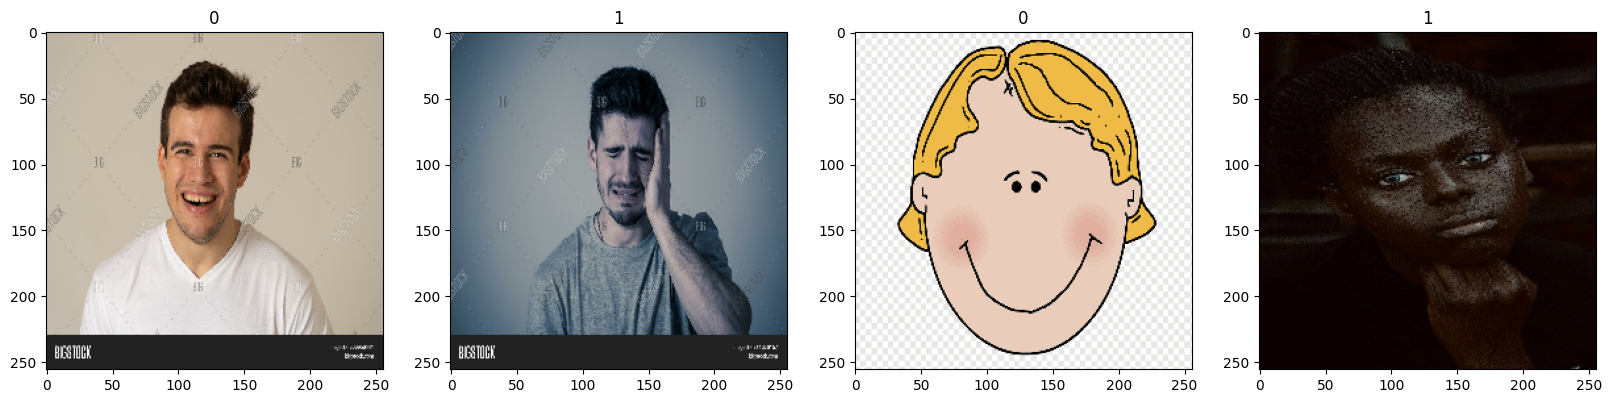

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

0 for Happy Images

1 for sad images

In [ ]:
# Normalize the dataset
data = data.map(lambda x,y: (x/255, y))

## Split Data into Training, Validation, and Test Sets

In [ ]:
# Split data into training, validation, and test sets
"""
Splits the dataset into training, validation, and test sets.
"""
total_images = len(data) * 32
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.2)

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)

## Deep Learning Model

In [ ]:
model = Sequential()

In [ ]:
# Build the CNN model
"""
Builds a Convolutional Neural Network (CNN) model.
"""

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())



model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_72 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_73 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 30, 30, 64)      

## Train the model

In [ ]:
# Train the model
"""
Trains the CNN model using the training and validation data.
"""
log_dir = '/content/drive/MyDrive/Mini Project 1/Logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
history = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 6s 1s/step - loss: 0.7329 - accuracy: 0.4896 - val_loss: 0.7038 - val_accuracy: 0.4688
Epoch 2/20
3/3 [==============================] - 6s 1s/step - loss: 0.7182 - accuracy: 0.4271 - val_loss: 0.6887 - val_accuracy: 0.6875
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6853 - accuracy: 0.6875 - val_loss: 0.6883 - val_accuracy: 0.4062
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.6747 - accuracy: 0.7188 - val_loss: 0.6891 - val_accuracy: 0.4688
Epoch 5/20
3/3 [==============================] - 6s 1s/step - loss: 0.6739 - accuracy: 0.6875 - val_loss: 0.6672 - val_accuracy: 0.5938
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.6510 - accuracy: 0.5833 - val_loss: 0.6729 - val_accuracy: 0.6562
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.5835 - accuracy: 0.7917 - val_loss: 0.5896 - val_accuracy: 0.6562
Epoch 8/20
3/3 [=========================

## Plot Performance

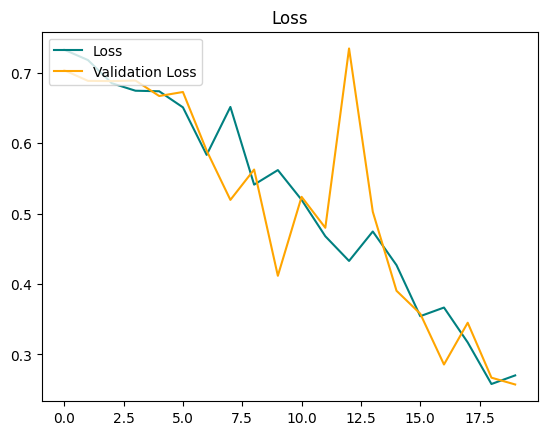

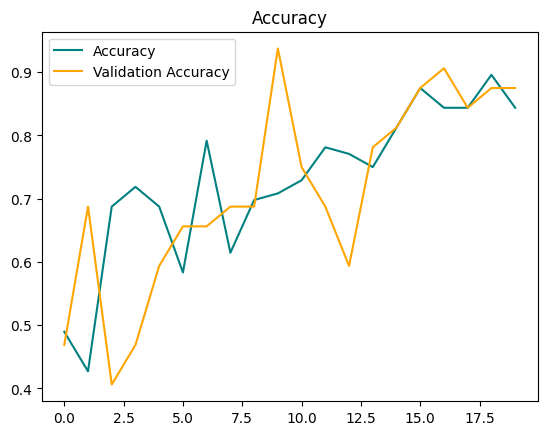

In [ ]:
# Plot training and validation metrics
"""
Plots the training and validation loss and accuracy.
"""
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss')
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend(loc='upper left')
plt.show()

## Model Evaluation

In [ ]:
# Evaluate the model
"""
Evaluates the model's performance on the test dataset.
"""
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

for batch in test_data.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    accuracy.update_state(y, y_pred)

print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

1/1 [==============================] - 0s 88ms/step
Precision: 0.75, Recall: 0.9230769276618958, Accuracy: 0.8333333134651184


Interpretation

Precision of 0.75: Out of all the instances that the model predicted as positive, 75% were actually positive. This indicates that there are some false positives.

Recall of 0.923: Out of all the actual positive instances, the model correctly identified 92.3% of them. This indicates that the model is good at identifying positive instances but might miss some.

Accuracy of 0.833: Overall, the model correctly predicted 83.3% of the instances, both positive and negative.

1/1 [==============================] - 0s 32ms/step


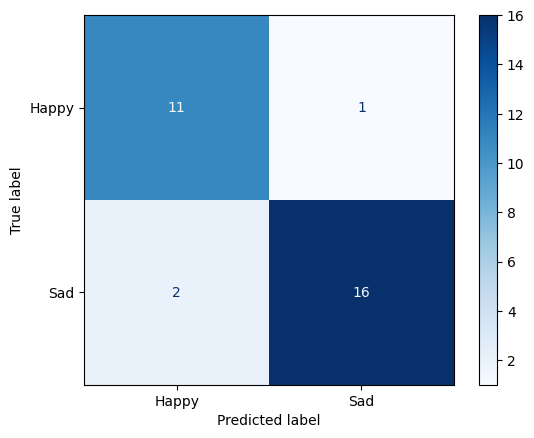

Classification Report:
              precision    recall  f1-score   support

       Happy       0.85      0.92      0.88        12
         Sad       0.94      0.89      0.91        18

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:

# Initialize lists to collect true labels and predictions
y_true = []
y_pred = []

# Collect true labels and predictions
for batch in test_data.as_numpy_iterator():
    X, y = batch
    y_true.extend(y.astype(int))  # Directly use y without .numpy()
    predictions = model.predict(X)
    y_pred.extend((predictions > 0.5).astype(int).flatten())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Happy', 'Sad'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute classification report
report = classification_report(y_true, y_pred, target_names=['Happy', 'Sad'])
print("Classification Report:")
print(report)

The model achieved a high overall accuracy of 90%, indicating strong performance in classification.

Precision for "Sad" (0.94) is higher than for "Happy" (0.85), showing better accuracy in predicting "Sad" images.

Recall is higher for "Happy" (0.92) compared to "Sad" (0.89), suggesting better identification of "Happy" images.

Both F1-scores are high, with "Sad" (0.91) slightly outperforming "Happy" (0.88), reflecting a good balance between precision and recall.

The weighted and macro averages confirm overall effectiveness, with balanced metrics across classes.

## Testing the model

1/1 [==============================] - 0s 19ms/step
Predicted class for happy1.jpg: HAPPY[[0.93626976]]
1/1 [==============================] - 0s 18ms/step
Predicted class for sad2.jpg: SAD[[0.37140858]]


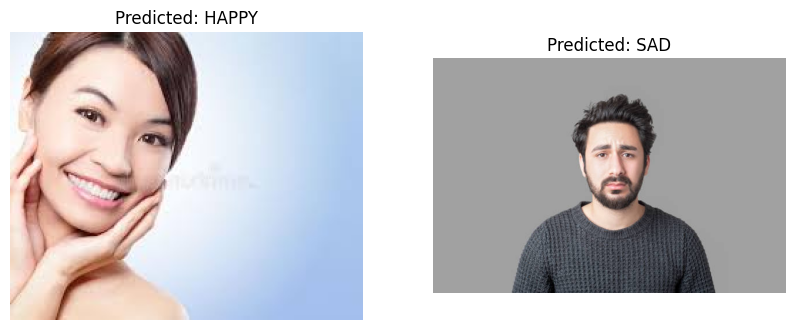

In [ ]:
# Predict classes for test images
"""
Predicts the class of test images using the trained model.
"""
test_image_paths = [
    '/content/drive/MyDrive/Mini Project 1/Test/happy1.jpg',
    '/content/drive/MyDrive/Mini Project 1/Test/sad2.jpg'
]

# Create a figure with subplots to display the images
fig, axes = plt.subplots(1, len(test_image_paths), figsize=(10, 5))

for i, img_path in  enumerate (test_image_paths):
  # Read and preprocess the image
    img = cv2.imread(img_path)
    img_resized = tf.image.resize(img, (256, 256))
    img_normalized = img_resized / 255.0

   # Predict the class
    prediction = model.predict(np.expand_dims(img_normalized, 0))
    predicted_class = 'SAD'  if prediction < 0.5 else 'HAPPY'
    print(f'Predicted class for {os.path.basename(img_path)}: {predicted_class}{prediction}')

# Plot and show each image
    # Display the image and prediction
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Predicted: {predicted_class}')

plt.show()


The model predicts that the image happy1.jpg belongs to the class "HAPPY" with a confidence score of approximately 93.63%.

The model predicts that the image sad2.jpg belongs to the class "SAD" with a confidence score of approximately 37.14%.

# Save the Model

In [ ]:
# Save and load the model
"""
Saves and loads the model.
"""
model_path = os.path.join('/content/drive/MyDrive/Mini Project 1', 'imageclassifier.h5')
model.save(model_path)
loaded_model = load_model(model_path)

In [ ]:
# Predict using the loaded model
loaded_model_prediction = loaded_model.predict(np.expand_dims(img_normalized, 0))
print(f'Prediction from loaded model: {loaded_model_prediction}')

1/1 [==============================] - 0s 80ms/step
Prediction from loaded model: [[0.37140858]]


The model achieved a high accuracy of 90%, with precision, recall, and F1-scores indicating strong performance across both "Happy" and "Sad" classes. TensorFlow's metrics confirm this effectiveness, showing balanced evaluation results.